In [1]:
# https://dododas.github.io/linear-algebra-with-python/posts/16-12-29-2d-transformations.html

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Create a grid of points in x-y space 
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

In [4]:
a = np.column_stack([[2, 1], [-1, 1]])

In [5]:
a

array([[ 2, -1],
       [ 1,  1]])

In [6]:
# Apply linear transform
a = np.column_stack([[2, 1], [-1, 1]])
print(a)
uvgrid = np.dot(a, xygrid)
print(uvgrid)

[[ 2 -1]
 [ 1  1]]
[[ -5.  -6.  -7.  -8.  -9. -10. -11.  -3.  -4.  -5.  -6.  -7.  -8.  -9.
   -1.  -2.  -3.  -4.  -5.  -6.  -7.   1.   0.  -1.  -2.  -3.  -4.  -5.
    3.   2.   1.   0.  -1.  -2.  -3.   5.   4.   3.   2.   1.   0.  -1.
    7.   6.   5.   4.   3.   2.   1.   9.   8.   7.   6.   5.   4.   3.
   11.  10.   9.   8.   7.   6.   5.]
 [ -7.  -6.  -5.  -4.  -3.  -2.  -1.  -6.  -5.  -4.  -3.  -2.  -1.   0.
   -5.  -4.  -3.  -2.  -1.   0.   1.  -4.  -3.  -2.  -1.   0.   1.   2.
   -3.  -2.  -1.   0.   1.   2.   3.  -2.  -1.   0.   1.   2.   3.   4.
   -1.   0.   1.   2.   3.   4.   5.   0.   1.   2.   3.   4.   5.   6.
    1.   2.   3.   4.   5.   6.   7.]]


In [39]:
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

Text(0.5, 1.0, 'Original grid in x-y space')

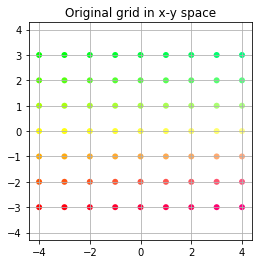

In [102]:
colors = list(map(colorizer, xygrid[0], xygrid[1]))
plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(xygrid[0], xygrid[1], s=36,c=colors,  edgecolor="none")
# Set axis limits
plt.grid(True)
plt.axis("equal")
plt.title("Original grid in x-y space")

In [41]:
# To animate the transform, we generate a series of intermediates
# Function to compute all intermediate transforms
def stepwise_transform(a, points, nsteps=30):
    '''
    Generate a series of intermediate transform for the matrix multiplication
      np.dot(a, points) # matrix multiplication
    starting with the identity matrix, where
      a: 2-by-2 matrix
      points: 2-by-n array of coordinates in x-y space 

    Returns a (nsteps + 1)-by-2-by-n array
    '''
    # create empty array of the right size
    transgrid = np.zeros((nsteps+1,) + np.shape(points))
    # compute intermediate transforms
    for j in range(nsteps+1):
        intermediate = np.eye(2) + j/nsteps*(a - np.eye(2)) 
        transgrid[j] = np.dot(intermediate, points) # apply intermediate matrix transformation
    return transgrid

# Apply to x-y grid
steps = 30
transform = stepwise_transform(a, xygrid, nsteps=steps)


In [50]:
import os
os.chdir('/home/logcomex/Música')

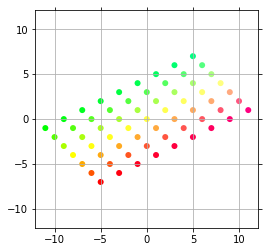

In [90]:
# Create a series of figures showing the intermediate transforms
def make_plots(transarray, color, outdir="png-frames", figuresize=(4,4), figuredpi=150):
    '''
    Generate a series of png images showing a linear transformation stepwise
    '''
    nsteps = transarray.shape[0]
    ndigits = len(str(nsteps)) # to determine filename padding
    maxval = np.abs(transarray.max()) # to set axis limits
    # create directory if necessary
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    # create figure
    plt.ioff()
    fig = plt.figure(figsize=figuresize, facecolor="w")
    for j in range(nsteps): # plot individual frames
        plt.cla()
        plt.scatter(transarray[j,0], transarray[j,1], s=36, c=color, edgecolor="none")
        plt.xlim(1.1*np.array([-maxval, maxval]))
        plt.ylim(1.1*np.array([-maxval, maxval]))
        plt.grid(True)
        plt.draw()
        # save as png
        outfile = os.path.join(outdir, "frame-" + str(j+1).zfill(ndigits) + ".png")
        fig.savefig(outfile, dpi=figuredpi)
    plt.ion()

# Generate figures
make_plots(transform, colors, outdir="tmp")


In [72]:
import glob
# All files ending with .txt
filenames = glob.glob("/home/logcomex/Música/tmp/frame-*.png")

In [75]:
filenames.sort()

In [95]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/home/logcomex/Música/tmp/movie.gif', images,duration = 0.1)

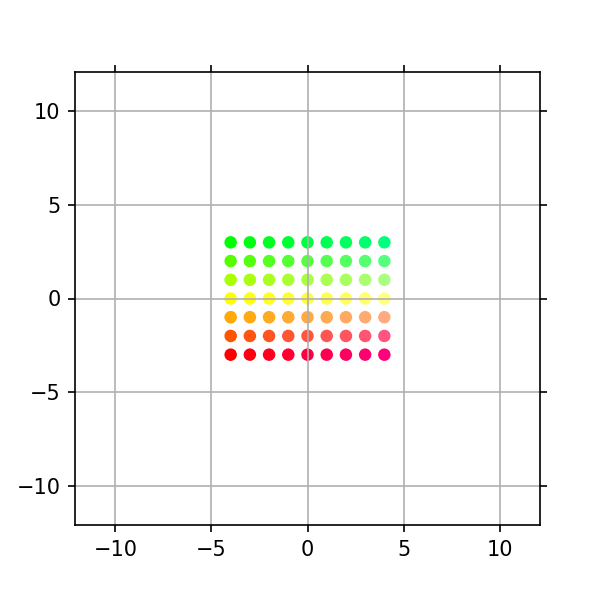

In [96]:
from IPython.display import Image, display
display(Image(filename='/home/logcomex/Música/tmp/movie.gif'))